In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
bank_info = pd.read_csv('bank-additional-full.csv', delimiter=";")
dataset = bank_info.drop(bank_info.columns[7:15], axis=1)
ir = dataset.replace(['yes','no','unknown'], [1, 0, 0])
#bank_info.columns[7:15]
print(ir.shape)
print(sum(ir['loan']))
print(sum(ir['housing']))

(41188, 13)
6248
21576


In [4]:
print('The percentage of people having a personal loan in the data is %f%%' % (6248/41188*100))
print('The percentage of people having a housing loan in the data is %f%%' % (21576/41188*100))

The percentage of people having a personal loan in the data is 15.169467%
The percentage of people having a housing loan in the data is 52.384190%


In [3]:
dataset.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [4]:
dataset.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

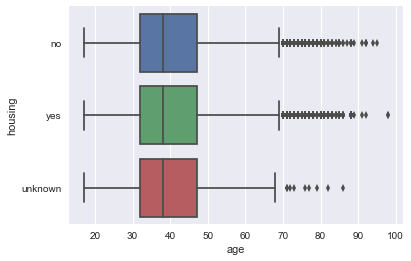

In [16]:
sns.boxplot(dataset['age'],dataset['housing'])
sns.despine()

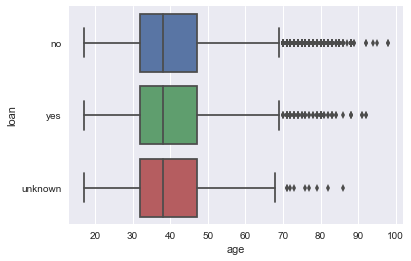

In [17]:
sns.boxplot(dataset['age'],dataset['loan'])
sns.despine()

In [61]:
h_m = dataset.groupby(['marital', 'housing']).size().unstack()
h_m['percentage'] = h_m.yes / (h_m.no + h_m.yes + h_m.unknown)
h_m.sort_values('percentage')#.drop(h_m.columns[0:3], axis = 1).plot(kind='bar')

housing,no,unknown,yes,percentage
marital,,,,
unknown,44,1,35,0.437500
married,11389,588,12951,0.519536
divorced,2092,121,2399,0.520165
single,5097,280,6191,0.535183


In [62]:
l_e = dataset.groupby(['education', 'loan']).size().unstack().fillna(0)
l_e['percentage'] = l_e.yes / (l_e.no + l_e.yes + l_e.unknown)
l_e.sort_values('percentage')#.drop(l_e.columns[0:3], axis = 1).plot(kind='bar')

loan,no,unknown,yes,percentage
education,,,,
unknown,1449.0,40.0,242.0,0.139804
basic.6y,1902.0,60.0,330.0,0.143979
basic.9y,5011.0,151.0,883.0,0.146071
basic.4y,3435.0,117.0,624.0,0.149425
professional.course,4325.0,125.0,793.0,0.151249
high.school,7852.0,220.0,1443.0,0.151655
university.degree,9961.0,277.0,1930.0,0.158613
illiterate,15.0,0.0,3.0,0.166667


In [63]:
h_e = dataset.groupby(['education', 'housing']).size().unstack().fillna(0)
h_e['percentage'] = h_e.yes / (h_e.no + h_e.yes + h_e.unknown)
h_e.sort_values('percentage')#.drop(h_e.columns[0:3], axis = 1).plot(kind='bar')

housing,no,unknown,yes,percentage
education,,,,
basic.4y,1955.0,117.0,2104.0,0.503831
unknown,816.0,40.0,875.0,0.505488
basic.6y,1070.0,60.0,1162.0,0.506981
high.school,4363.0,220.0,4932.0,0.518339
basic.9y,2743.0,151.0,3151.0,0.521257
university.degree,5387.0,277.0,6504.0,0.534517
professional.course,2280.0,125.0,2838.0,0.541293
illiterate,8.0,0.0,10.0,0.555556


In [58]:
h_j = dataset.groupby(['job', 'loan']).size().unstack().fillna(0)
h_j['percentage'] = h_j.yes / (h_j.no + h_j.yes + h_j.unknown)
h_j.sort_values('percentage')#.drop(h_j.columns[0:3], axis = 1).plot(kind='bar')

loan,no,unknown,yes,percentage
job,,,,
self-employed,1186,40,195,0.137227
retired,1436,44,240,0.139535
entrepreneur,1214,36,206,0.141484
housemaid,877,29,154,0.145283
technician,5607,147,989,0.146671
unemployed,838,27,149,0.146943
blue-collar,7648,240,1366,0.147612
management,2414,71,439,0.150137
services,3267,101,601,0.151424
